Code adapted from https://tavareshugo.github.io/data-carpentry-rnaseq/03_rnaseq_pca.html
Authors: Rohini Gadde & Mike Cuoco

In [1]:
library(tidyverse)
library(ggfortify)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
quant_matrix <- read.csv("../data/rsem/quant_matrix.csv", header = T)
sample_info <- read.csv("../data/sample_info.csv", header = T)

head(quant_matrix)
head(sample_info)

,gene_id,SRR10079579,SRR10079580,SRR10079581,SRR10079582,SRR10079583,SRR10079584,SRR10079585,SRR10079586,SRR10079587,⋯,SRR10079629,SRR10079630,SRR10079631,SRR10079632,SRR10079633,SRR10079634,SRR10079635,SRR10079636,SRR10079637,SRR10079638
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0610005C13Rik,0.00,0.00,0.11,0.12,0.13,0.00,0.07,0.00,0.09,⋯,0.24,0.71,0.61,0.31,0.26,0.00,0.00,0.76,0.60,0.40
2,0610006L08Rik,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.09,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00
3,0610007P14Rik,25.72,28.72,33.26,27.29,36.56,29.67,37.23,38.32,41.11,⋯,97.26,114.37,113.46,116.98,81.56,89.09,105.20,119.94,102.91,88.46
4,0610009B22Rik,94.54,94.27,119.30,69.56,96.12,79.32,111.62,115.56,101.60,⋯,108.15,124.74,130.35,131.18,129.32,132.42,134.02,138.96,123.11,108.27
5,0610009E02Rik,0.24,0.25,0.23,0.36,0.51,0.52,0.10,0.49,0.44,⋯,2.62,1.21,2.84,1.82,1.42,0.82,0.75,2.10,2.10,0.69
6,0610009L18Rik,7.68,16.09,7.85,10.92,13.54,6.86,13.11,9.81,10.33,⋯,33.30,22.13,36.73,16.58,23.77,26.82,32.26,32.93,34.86,22.92


,run,condition,strain,month,cell,replicate
,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,SRR10079579,WT2m,WT,2,microglia,1
2,SRR10079580,WT2m,WT,2,microglia,2
3,SRR10079581,WT2m,WT,2,microglia,3
4,SRR10079582,WT4m,WT,4,microglia,1
5,SRR10079583,WT4m,WT,4,microglia,2
6,SRR10079584,WT4m,WT,4,microglia,3


In [3]:
pca_matrix <- quant_matrix %>%
  column_to_rownames("gene_id") %>%
  as.matrix() %>%
  t()

# Remove rows where gene expression is zero
pca_matrix <- pca_matrix[,colSums(pca_matrix) != 0]
head(pca_matrix)

,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,⋯,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
SRR10079579,0.00,0,25.72,94.54,0.24,7.68,3.61,0.36,3.65,141.38,⋯,1.50,2.20,5.07,0,3.04,36.78,2.74,6.98,0.00,46.82
SRR10079580,0.00,0,28.72,94.27,0.25,16.09,3.00,1.10,5.64,151.89,⋯,1.40,2.14,5.15,0,3.04,35.51,2.72,8.02,0.02,49.10
SRR10079581,0.11,0,33.26,119.30,0.23,7.85,4.26,0.49,3.72,162.32,⋯,1.27,1.87,4.47,0,2.58,34.02,1.93,7.38,0.00,63.13
SRR10079582,0.12,0,27.29,69.56,0.36,10.92,3.27,0.54,3.08,122.38,⋯,1.05,1.33,3.01,0,2.90,28.09,2.06,6.41,0.00,39.99
SRR10079583,0.13,0,36.56,96.12,0.51,13.54,5.26,0.68,6.24,157.94,⋯,1.27,2.10,4.54,0,3.07,41.20,2.69,8.04,0.00,51.64
SRR10079584,0.00,0,29.67,79.32,0.52,6.86,5.30,1.09,5.37,140.65,⋯,1.25,1.90,4.43,0,3.47,33.56,2.35,8.93,0.00,40.20


In [4]:
pca <- prcomp(pca_matrix, scale = TRUE)

In [5]:
pc_eigenvalues <- pca$sdev^2

# create a "tibble" manually with 
# a variable indicating the PC number
# and a variable with the variances
pc_eigenvalues <- tibble(PC = factor(1:length(pc_eigenvalues)), 
                         variance = pc_eigenvalues) %>% 
  # add a new column with the percent variance
  mutate(pct = variance/sum(variance)*100) %>% 
  # add another column with the cumulative variance explained
  mutate(pct_cum = cumsum(pct))

# print the result
head(pc_eigenvalues)

PC,variance,pct,pct_cum
<fct>,<dbl>,<dbl>,<dbl>
1,9602.8731,34.796801,34.79680
2,2237.2791,8.106965,42.90377
3,2060.7369,7.467250,50.37102
4,1002.5465,3.632810,54.00382
5,784.2454,2.841778,56.84560
6,573.9698,2.079827,58.92543


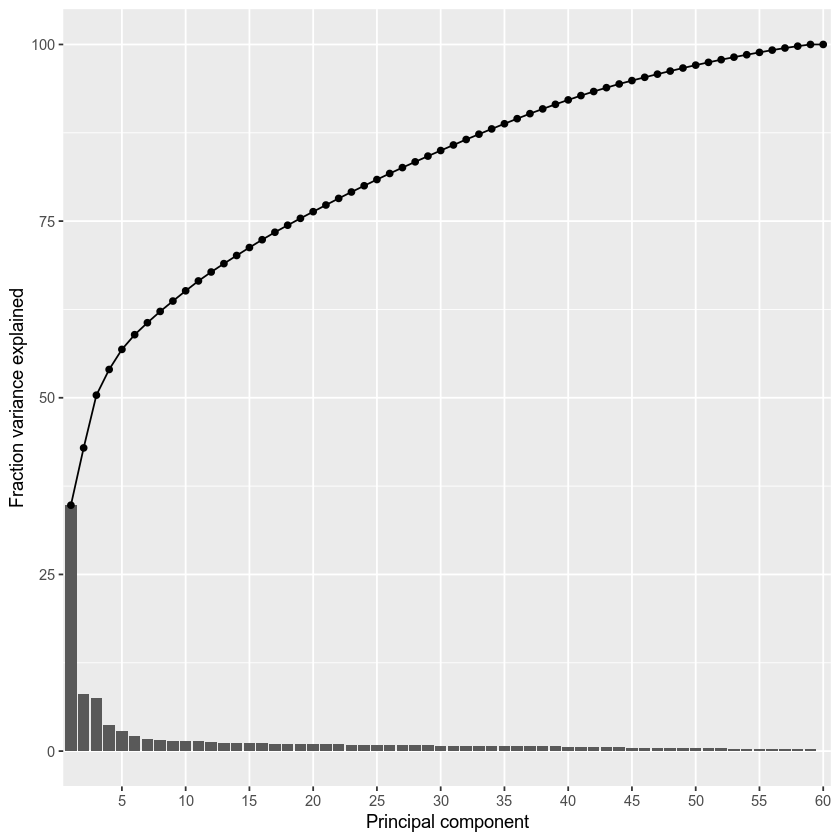

In [6]:
pc_eigenvalues %>% 
  ggplot(aes(x = PC)) +
  geom_col(aes(y = pct)) +
  geom_line(aes(y = pct_cum, group = 1)) + 
  geom_point(aes(y = pct_cum)) +
  scale_x_discrete(breaks = seq(5, 60, by = 5)) +
  labs(x = "Principal component", y = "Fraction variance explained")

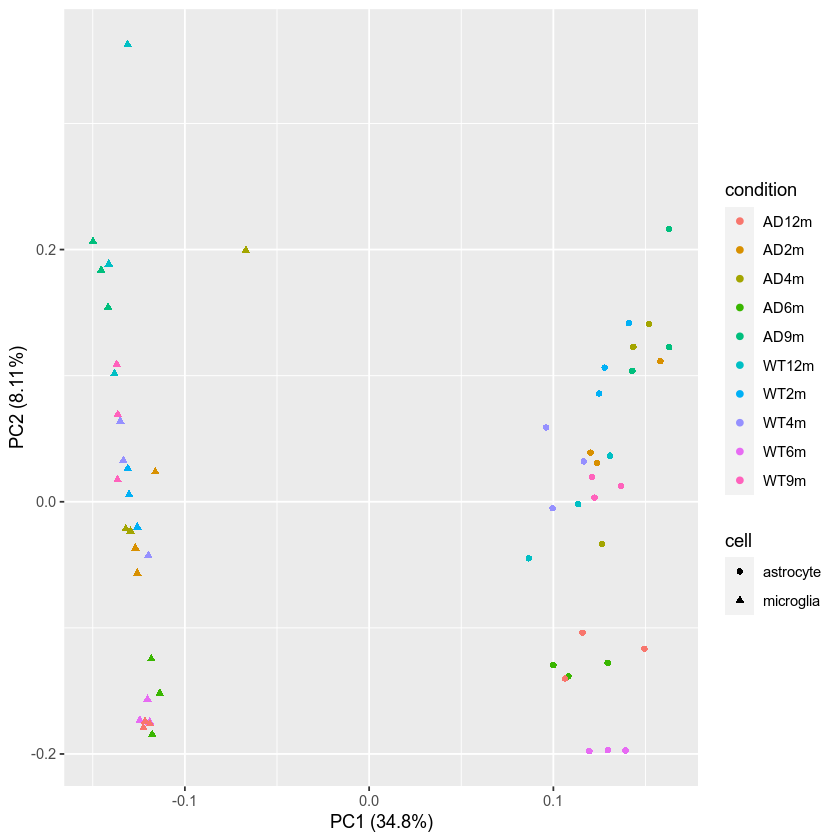

In [7]:
autoplot(pca, data = sample_info, colour = "condition", shape = "cell")

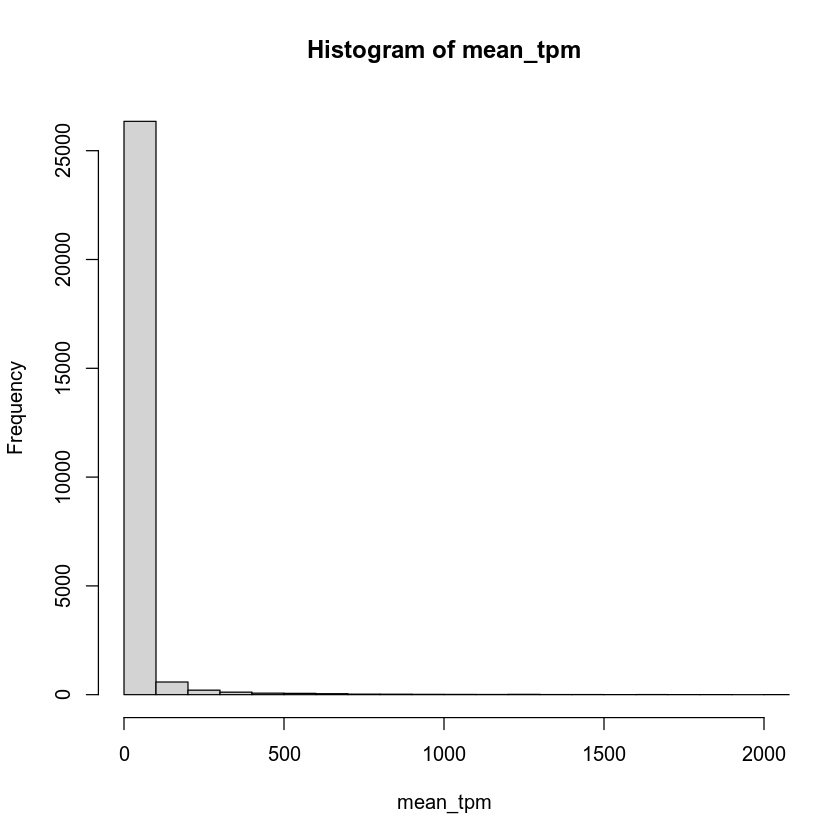

In [49]:
# Find some gene expression threshold 
mean_tpm <- colMeans(pca_matrix)
hist(mean_tpm, breaks = 1000, xlim = c(0, 2000))

In [53]:
# Conduct PCA on the microglia data
micro_mat <- pca_matrix[c(1:30),]
micro_mat <- micro_mat[,colSums(micro_mat) != 0]

micro_pca <- prcomp(micro_mat, scale = TRUE)

PC,variance,pct,pct_cum
<fct>,<dbl>,<dbl>,<dbl>
1,5159.0219,21.355335,21.35534
2,4153.7456,17.194079,38.54941
3,2937.2782,12.158615,50.70803
4,1512.2079,6.259657,56.96769
5,1187.7309,4.916512,61.88420
6,734.9828,3.042399,64.92660


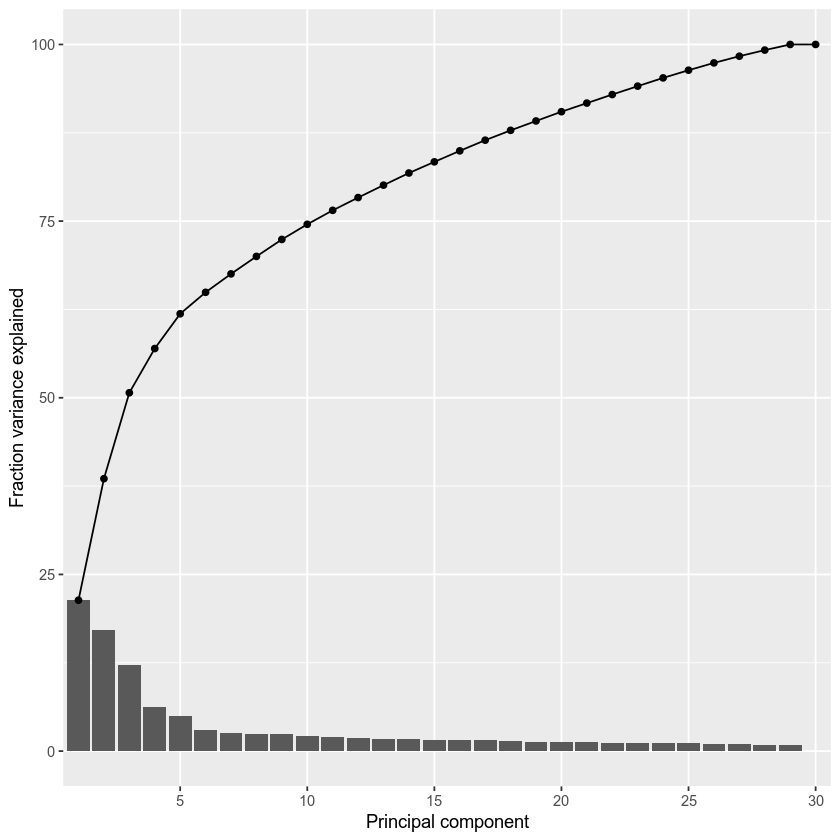

In [55]:
# Scree plot 
micro_eigenvalues <- micro_pca$sdev^2

micro_eigenvalues <- tibble(PC = factor(1:length(micro_eigenvalues)), 
                         variance = micro_eigenvalues) %>% 
  # add a new column with the percent variance
  mutate(pct = variance/sum(variance)*100) %>% 
  # add another column with the cumulative variance explained
  mutate(pct_cum = cumsum(pct))

head(micro_eigenvalues)

micro_eigenvalues %>% 
  ggplot(aes(x = PC)) +
  geom_col(aes(y = pct)) +
  geom_line(aes(y = pct_cum, group = 1)) + 
  geom_point(aes(y = pct_cum)) +
  scale_x_discrete(breaks = seq(5, 60, by = 5)) +
  labs(x = "Principal component", y = "Fraction variance explained")

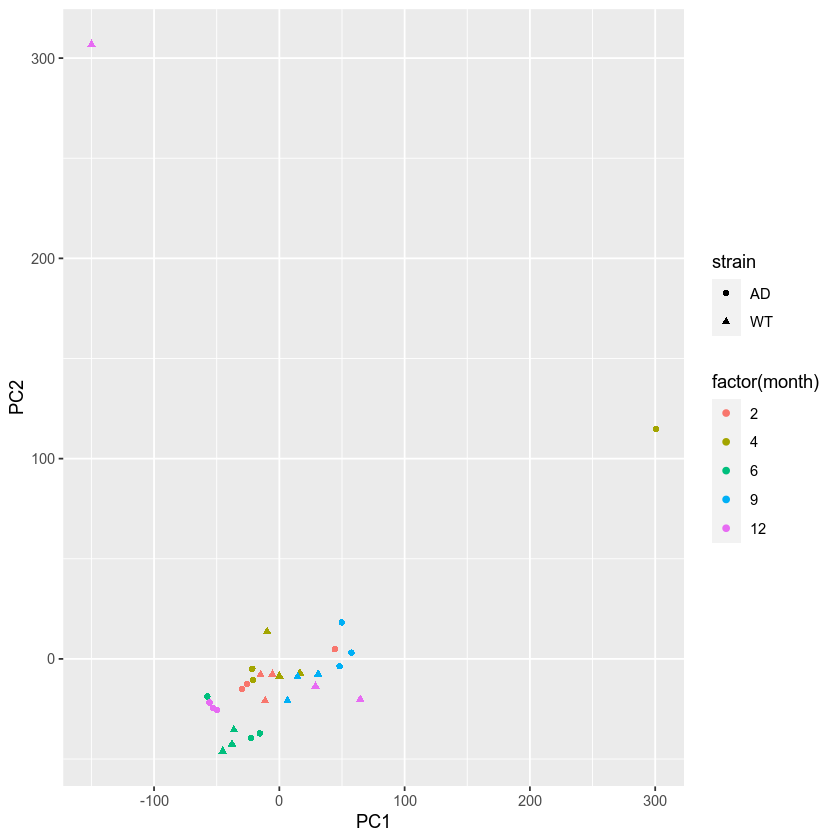

In [88]:
# PC plot
mscores <- micro_pca$x

mscores <- mscores %>% 
  # convert to a tibble retaining the sample names as a new column
  as_tibble(rownames = "sample") %>%
  # join with sample_info table
  mutate(sample_info[c(1:30), c(3:6)])

mscores %>% 
  # create the plot
  ggplot(aes(x = PC1, y = PC2, color = factor(month), shape = strain)) +
  geom_point()

In [66]:
# Conduct PCA on the microglia data
astro_mat <- pca_matrix[c(31:60),]
astro_mat <- astro_mat[,colSums(astro_mat) != 0]

astro_pca <- prcomp(astro_mat, scale = TRUE)

PC,variance,pct,pct_cum
<fct>,<dbl>,<dbl>,<dbl>
1,5284.839,19.849908,19.84991
2,2439.748,9.163717,29.01362
3,2054.577,7.717011,36.73064
4,1557.527,5.850088,42.58072
5,1145.604,4.302901,46.88362
6,1091.993,4.101537,50.98516


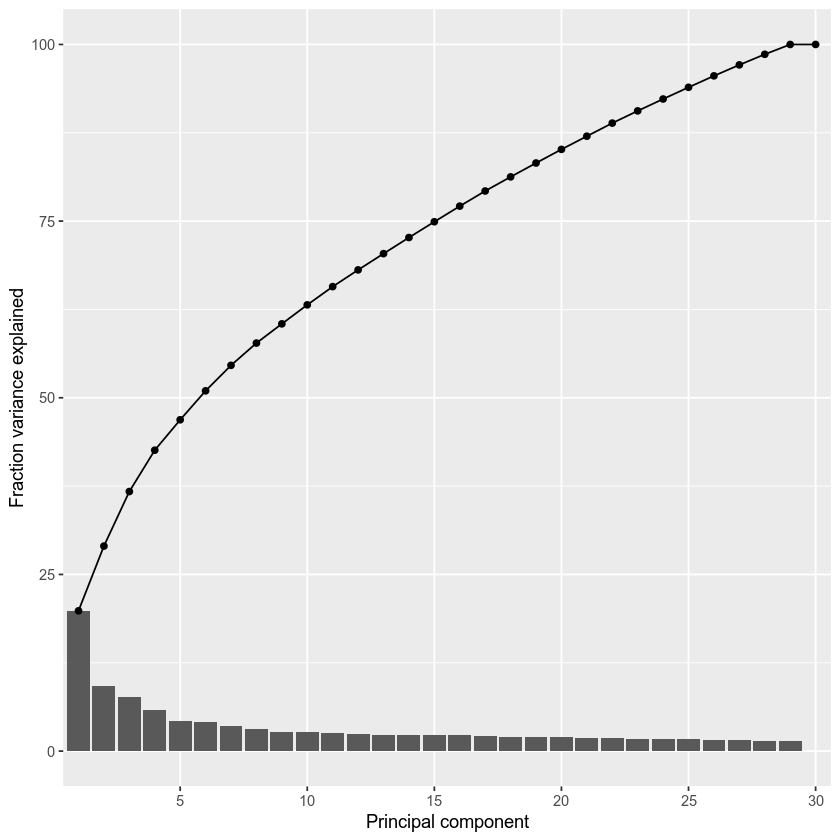

In [67]:
# Scree plot 
astro_eigenvalues <- astro_pca$sdev^2

astro_eigenvalues <- tibble(PC = factor(1:length(astro_eigenvalues)), 
                         variance = astro_eigenvalues) %>% 
  # add a new column with the percent variance
  mutate(pct = variance/sum(variance)*100) %>% 
  # add another column with the cumulative variance explained
  mutate(pct_cum = cumsum(pct))

head(astro_eigenvalues)

astro_eigenvalues %>% 
  ggplot(aes(x = PC)) +
  geom_col(aes(y = pct)) +
  geom_line(aes(y = pct_cum, group = 1)) + 
  geom_point(aes(y = pct_cum)) +
  scale_x_discrete(breaks = seq(5, 60, by = 5)) +
  labs(x = "Principal component", y = "Fraction variance explained")

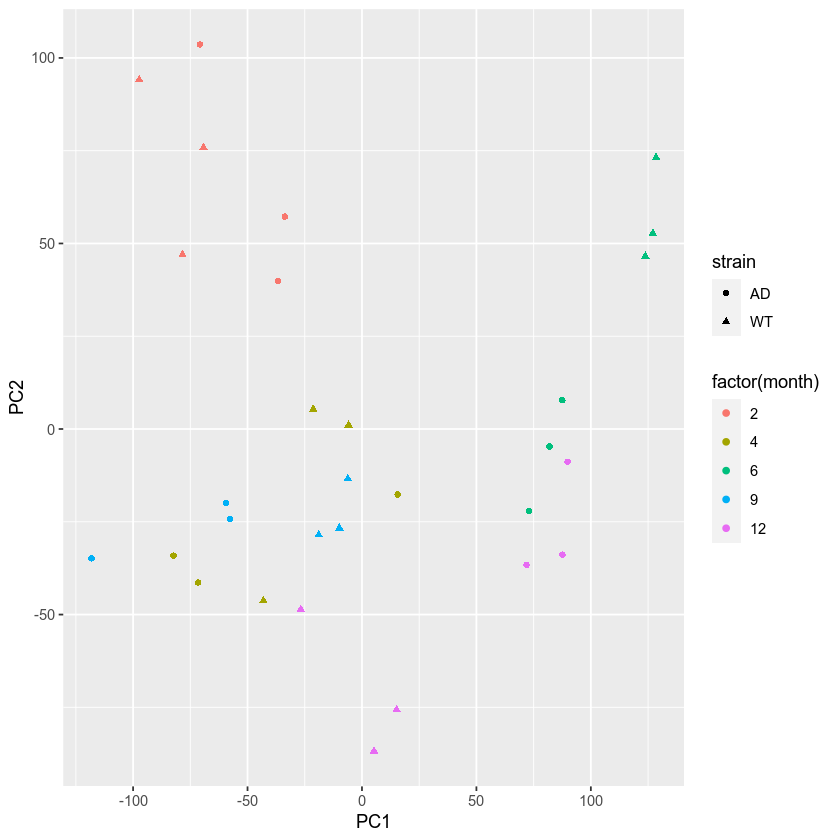

In [93]:
# PC plot
ascores <- astro_pca$x

ascores <- ascores %>% 
  # convert to a tibble retaining the sample names as a new column
  as_tibble(rownames = "sample") %>%
  # join with sample_info table
  mutate(sample_info[c(31:60), c(3:6)])

ascores %>% 
  # create the plot
  ggplot(aes(x = PC1, y = PC2, color = factor(month), shape = strain)) +
  geom_point()